In [1]:
import matplotlib.pyplot as pl
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 14

In [2]:
import chronos as cr

#high proper motion star
s = cr.Star(epicid=211817229, search_radius=10)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Target: EPIC 211817229
Searching Vizier: (126.973 17.5599) with radius=3.0 arcsec


Querying Gaia DR2 catalog for ra,dec=(126.973 17.5599) within 10.0 arcsec.
astrometric_excess_noise_sig>31.01 (>5 hints binarity).

astrometric_gof_al>20.31 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf



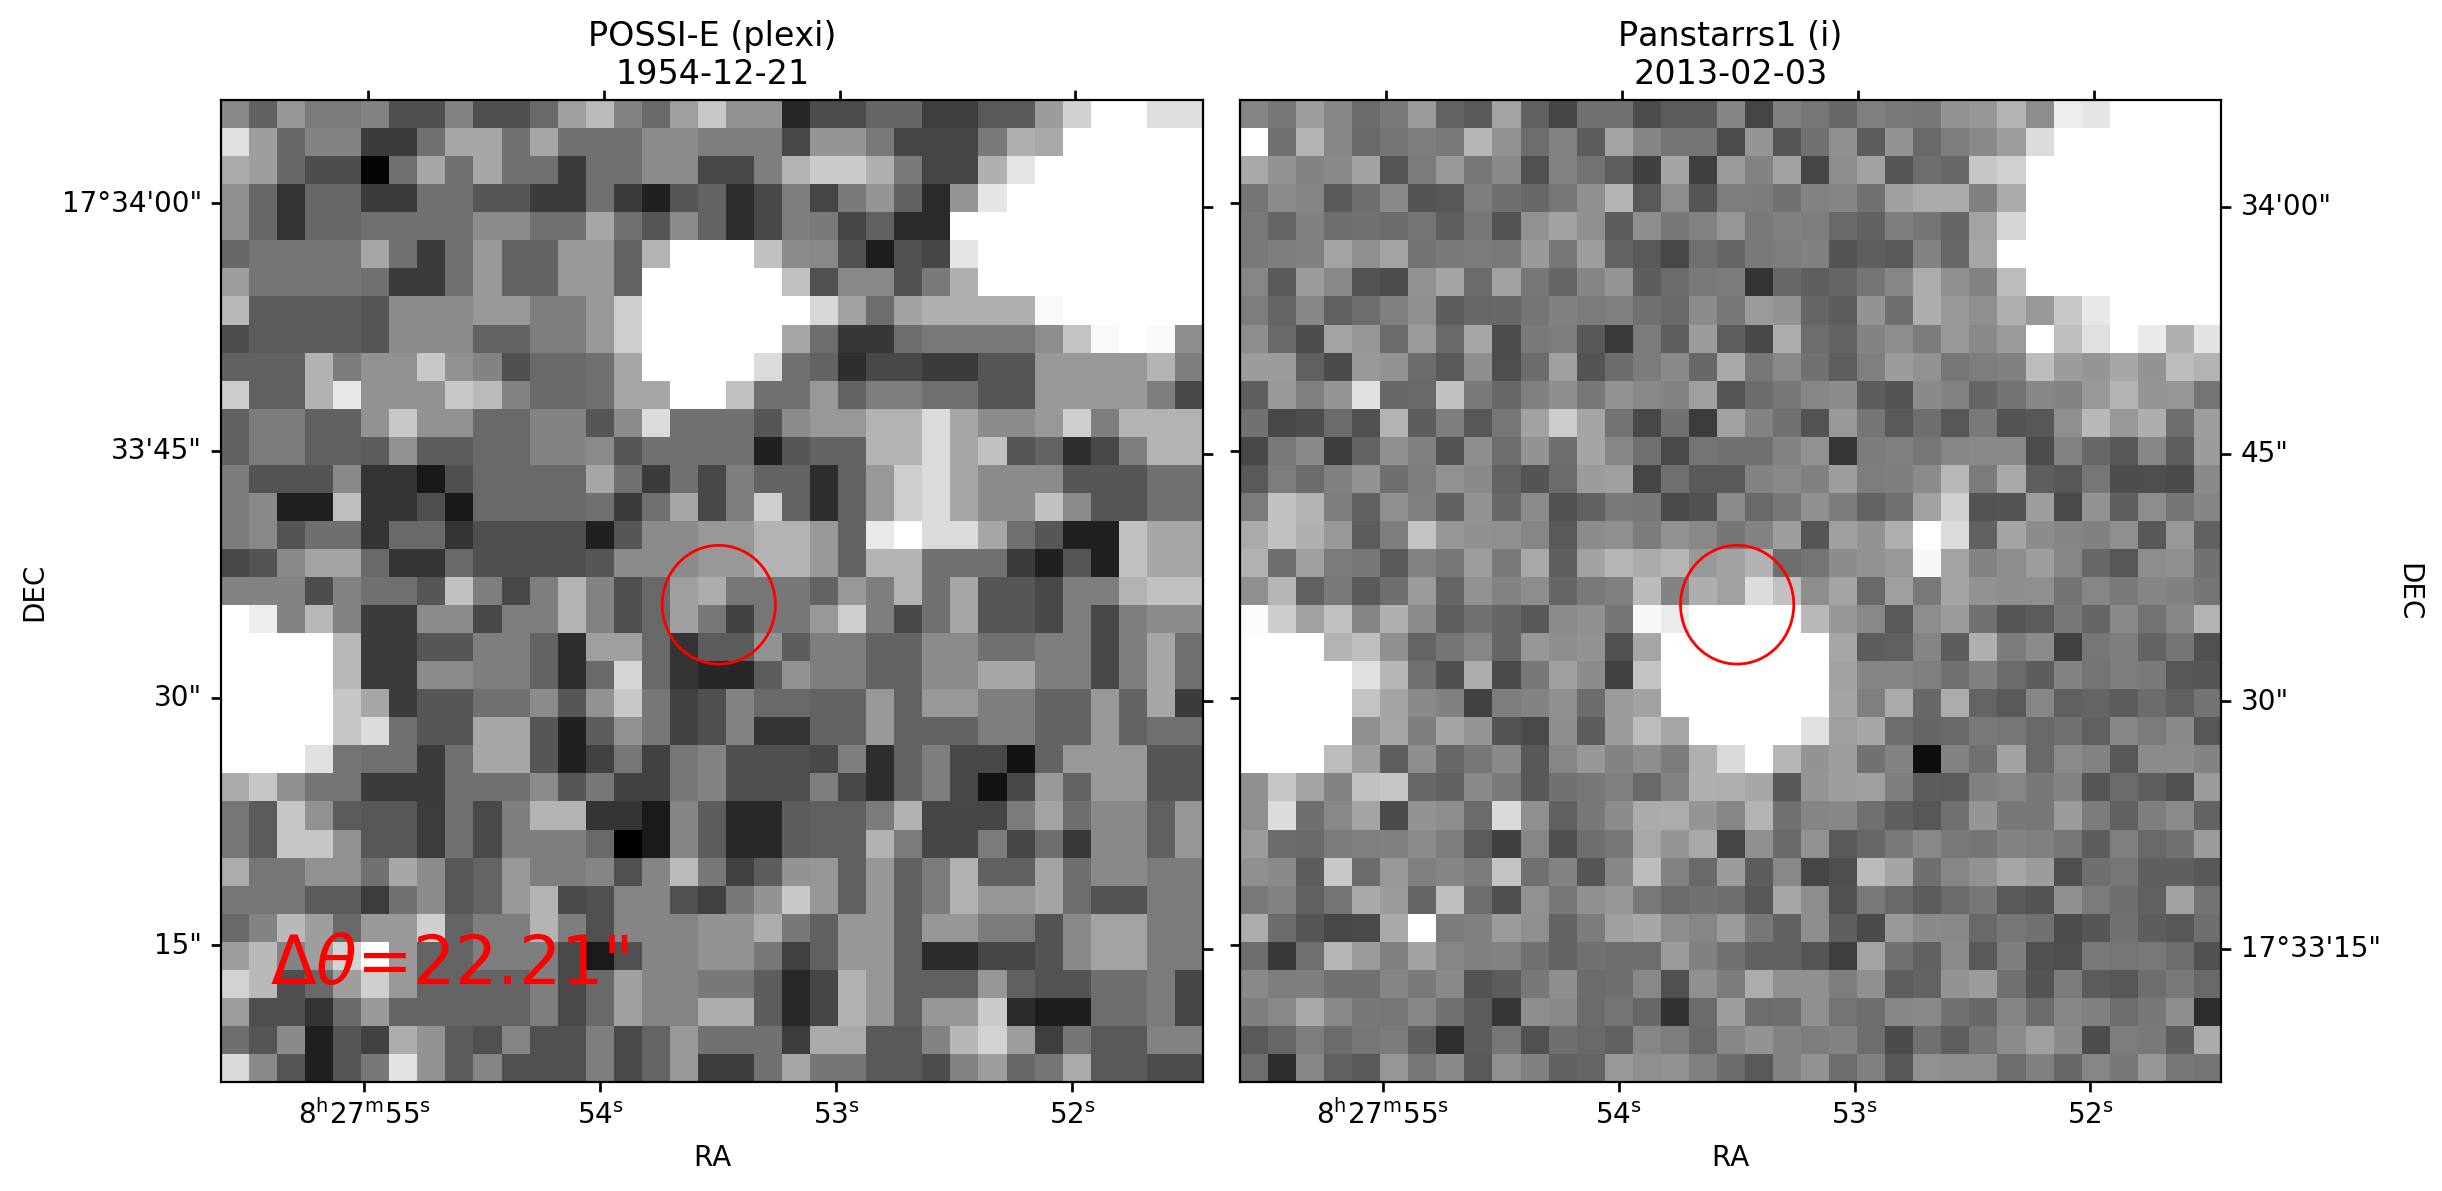

In [3]:
import numpy as np

fig, baseline = cr.plot_archival_images(ra=s.target_coord.ra.deg,
                        dec=s.target_coord.dec.deg,
                        survey1='dss1',
                        survey2='ps1',#'poss2ukstu_red'
                        filter='i',
                        return_baseline = True
                       )

gp = s.query_gaia_dr2_catalog(return_nearest_xmatch=True)
pmra, pmdec = gp['pmra'], gp['pmdec']
pm = np.hypot(pmra, pmdec) #mas/yr
offset = pm*baseline/1e3
text = r"$\Delta \theta$="+f"{offset:.2f}\""
ax = fig.axes[0]
ax.text(0.05, 0.1, text, transform=ax.transAxes, c='r', fontsize=24);